In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [183]:
# load and read data
customers = pd.read_csv('/content/Mall_Customers.csv')
customers.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [184]:
# shape of the data
customers.shape

(200, 5)

In [185]:
# info about the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [186]:
# checking for null values
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [187]:
# checking for duplicate values
customers.duplicated().any()

False

## **EDA**

<Axes: >

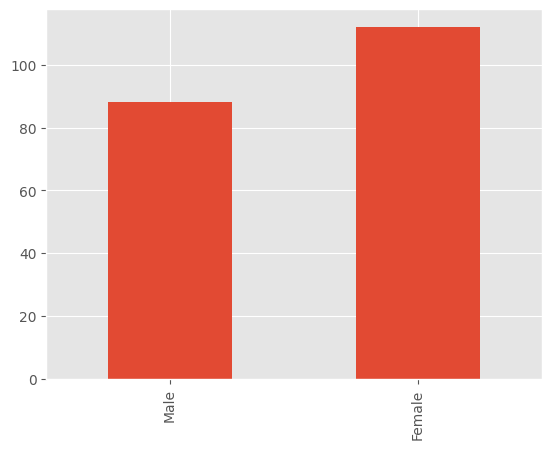

In [188]:
customers['Gender'].value_counts().sort_values().plot(kind='bar')

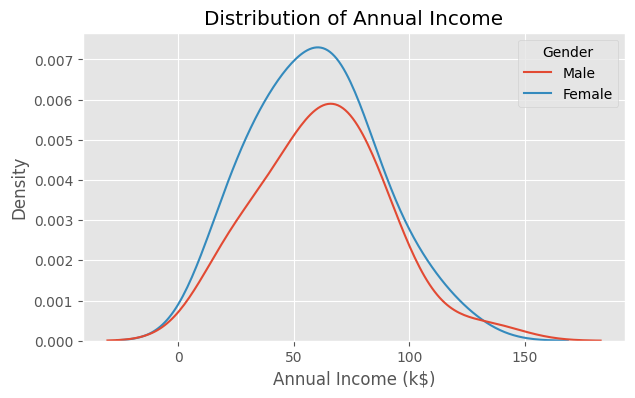

In [189]:
plt.figure(figsize=(7,4))

sns.kdeplot(data=customers, x='Annual Income (k$)', hue='Gender', bw_adjust=1.4)
plt.title('Distribution of Annual Income')
plt.show()

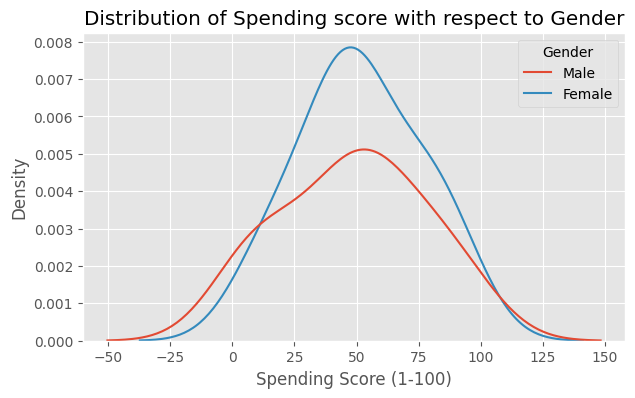

In [190]:
plt.figure(figsize=(7,4))

sns.kdeplot(data=customers, x = 'Spending Score (1-100)', hue='Gender',bw_adjust=1.5)
plt.title('Distribution of Spending score with respect to Gender')
plt.show()

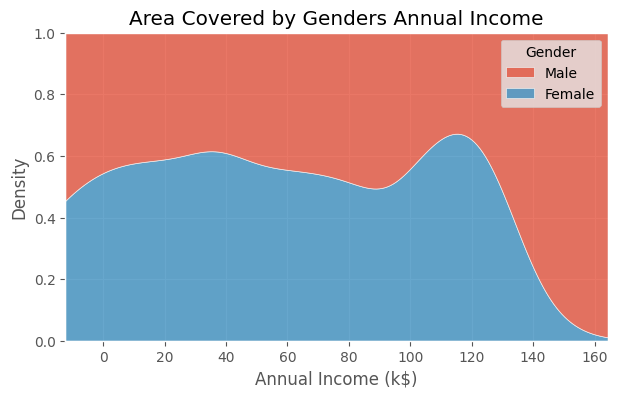

In [191]:
plt.figure(figsize=(7,4))

sns.kdeplot(data=customers, x='Annual Income (k$)', hue='Gender', multiple='fill')
plt.title('Area Covered by Genders Annual Income')
plt.show()

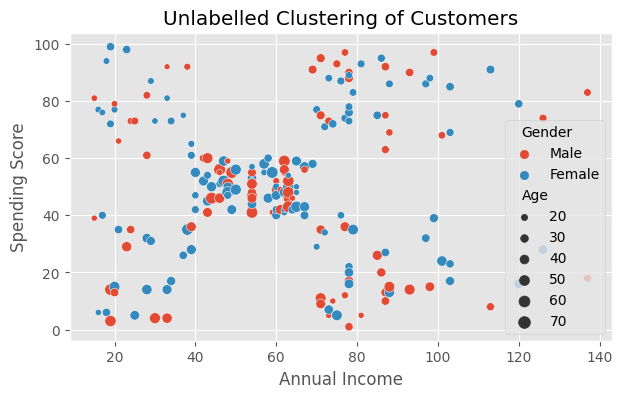

In [192]:
plt.figure(figsize=(7,4))

sns.scatterplot(data=customers, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue='Gender', size='Age')
plt.title('Unlabelled Clustering of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [193]:
from sklearn.cluster import KMeans
X = customers.iloc[:,[3,4]]
kmeans = KMeans(n_clusters=5, n_init=10, random_state=30)
y_pred = kmeans.fit_predict(X)


In [194]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [195]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [196]:
# function to plot cluster
def plot_cluster(kmeans,X):
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
             marker='x',s=1,color='r', linewidths=12, zorder=11,alpha=1)

  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1

  xx , yy = np.meshgrid(np.linspace(mins[0],maxs[0], 1000),
                        np.linspace(mins[1], maxs[1], 1000))

  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Set2')
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

  plt.xlabel("Annual Income")
  plt.ylabel("Spending Score")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


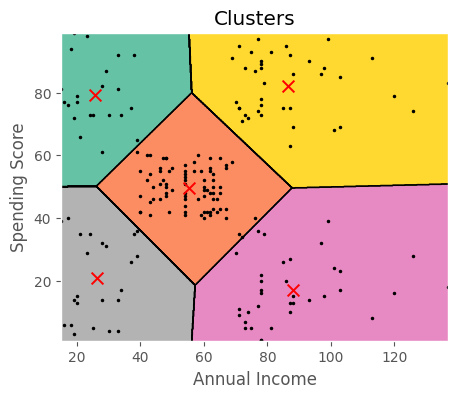

In [207]:
plt.figure(figsize=(5,4))
plt.plot(customers.iloc[:,3],customers.iloc[:,4],"k.",markersize=3)
plot_cluster(kmeans,X)
plt.title("Clusters")
plt.show()


## Searching for Optimum n_clusters

In [198]:
k = list(range(1,10))
inertias = []
for i in k:
  kmean_k = KMeans(n_clusters=i, n_init=10, random_state=20)
  kmean_k.fit(X)
  inertias.append(kmean_k.inertia_)


Text(0.5, 1.0, 'Elbow Graph')

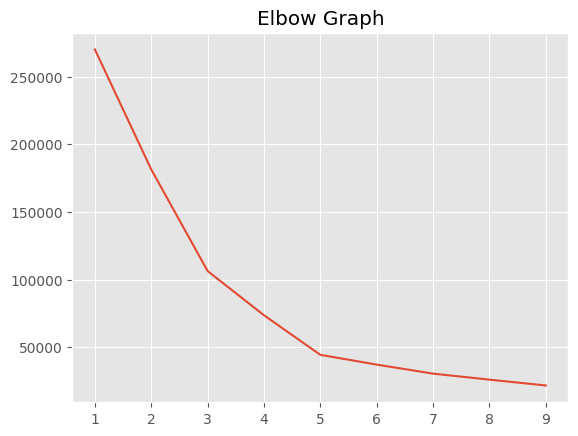

In [199]:
plt.plot(k,inertias)
plt.title('Elbow Graph')

In [200]:
kmeans_5 = KMeans(n_clusters=5, n_init=10, random_state =20)
kmeans_5.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=20)

In [201]:
kmeans_3 = KMeans(n_clusters=3, n_init=10, random_state=20)
kmeans_3.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=20)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'n_cluster=5')

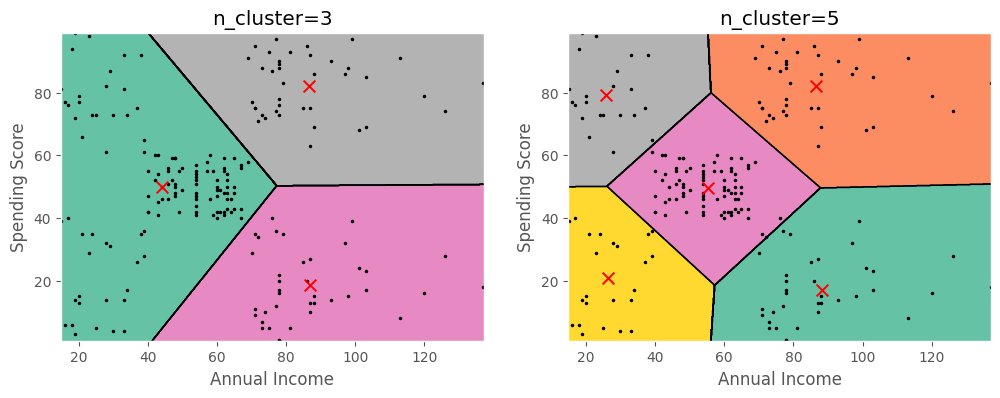

In [202]:
# plotting for k = 3, 5
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(customers.iloc[:,3],customers.iloc[:,4],"k.",markersize=3)
plot_cluster(kmeans_3,X)
plt.title("n_cluster=3")

plt.subplot(122)
plt.plot(customers.iloc[:,3],customers.iloc[:,4],"k.",markersize=3)
plot_cluster(kmeans_5,X)
plt.title("n_cluster=5")

In [203]:
# lets check silhoute and inertia for no of clusters = 3, 5

print(f"For k=3 silhoute score is {np.round(silhouette_score(X, kmeans_3.labels_),3)} and inertia is {np.round(kmeans_3.inertia_,3)}")
print(f"For k=5 silhoute score is {np.round(silhouette_score(X, kmeans_5.labels_),3)} and inertia is {np.round(kmeans_5.inertia_,3)}")

For k=3 silhoute score is 0.468 and inertia is 106348.373
For k=5 silhoute score is 0.554 and inertia is 44448.455


It is very clear from above visualizations and scores that n_cluster =5 is most optimal.